In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
#Had to use pip to install the package for pmdarima
import pmdarima as pm

from sklearn.metrics import r2_score
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')


demandData = pd.read_csv('C:\\Users\Brian\Desktop\EECS_731\Project5\Data\\Historical Product Demand.csv', index_col=[3], parse_dates=[3])
print(demandData.head())

print("\nThe number of warehouses based on count is:\n")
sns.countplot(x="Warehouse", palette="rocket",data=demandData)
print(demandData["Warehouse"].value_counts(), "\n")
print("Order demands is:\n")
print(demandData["Order_Demand"].value_counts(), "\n")

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
After reading in the dataset, the first five entries are displayed followed by the total number of warehouses. The number of warehouses is displayed in both a numerical and graphical manner. From these values it is clear to see that "Whse_J" has the highest order demand.


The popularity of products based on count is:

Category_019    481099
Category_005    101671
Category_001     97787
Category_007     82402
Category_021     52011
Category_006     35577
Category_028     31302
Category_011     23208
Category_015     22954
Category_024     20885
Category_009     19738
Category_026     14803
Category_030     12997
Category_032      9296
Category_022      8657
Category_023      7899
Category_018      5239
Category_003      4189
Category_013      3743
Category_020      3490
Category_031      2280
Category_033      1849
Category_008      1560
Category_012      1147
Category_010       976
Category_029       671
Category_017       615
Category_004       329
Category_002        77
Category_016        37
Category_025        35
Category_014        26
Category_027        26
Name: Product_Category, dtype: int64 



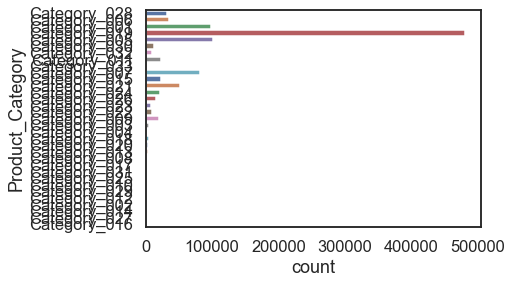

In [193]:
print("\nThe popularity of products based on count is:\n")
sns.countplot(y="Product_Category", palette="deep", data=demandData)
print(demandData["Product_Category"].value_counts(), "\n")


In [ ]:
Whether the graph is vertical or horizontal it is difficult to read the category numbers.
This is why I have chosed to print the numerical values as well as the graphical representation.

In [195]:
print(demandData["Product_Code"].value_counts())

Product_1359    16936
Product_1295    10575
Product_1378     9770
Product_0620     9428
Product_1286     8888
                ...  
Product_1912        2
Product_0853        1
Product_1703        1
Product_0465        1
Product_2099        1
Name: Product_Code, Length: 2160, dtype: int64


In [ ]:
The total numbers for each of the given products demonstrates that "Product_1359" has the largest number of units. Below the number of orders per year are displayed. From this depiction it is clear that just prior to 2014, there was a significant increase in the amount of orders compared to the other years in the data set

In [196]:
demandData["Order_Demand"] = demandData["Order_Demand"].astype(str)
demandData["Order_Demand"] = demandData["Order_Demand"].replace('[(]', '-', regex=True).astype(str)
demandData["Order_Demand"] = demandData["Order_Demand"].replace('[)]', '', regex=True).astype(int)
demandData['Product_Category'] = demandData['Product_Category'].astype(str)
demandData['Product_Category'] = demandData['Product_Category'].replace('[Category_]', '', regex=True).astype(int)

demandData['Product_Code'] = demandData['Product_Code'].astype(str)
demandData['Product_Code'] = demandData['Product_Code'].replace('[Product_]', '', regex=True).astype(int)
print(demandData["Order_Demand"].value_counts())

1000      112682
100        87272
1          63361
2000       51653
500        49013
           ...  
2214           1
453000         1
22700          1
6820           1
1535           1
Name: Order_Demand, Length: 3828, dtype: int64


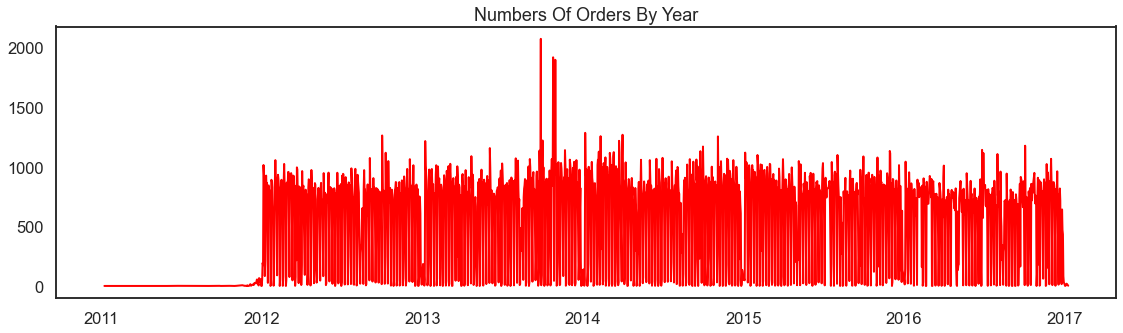

In [197]:
demandData.groupby([demandData.index.date]).count().Order_Demand.plot(color='red', figsize=(19,5), linewidth=2, markersize=12, title='Numbers Of Orders By Year')

In [198]:
demandData.sort_values(['Date', 'Product_Code', "Order_Demand"], inplace=True)
print(demandData.head(20))

            Product_Code Warehouse  Product_Category  Order_Demand
Date                                                              
2011-01-08           965    Whse_A                 6             2
2011-05-31          1724    Whse_A                 3           108
2011-06-24          1521    Whse_S                19          7000
2011-06-24          1521    Whse_S                19         85000
2011-09-02          1507    Whse_C                19          1250
2011-09-27           608    Whse_C                 1             5
2011-09-27          1933    Whse_C                 1            23
2011-09-30           875    Whse_C                23          5450
2011-10-20           125    Whse_S                11            -2
2011-10-20           412    Whse_S                 7            -2
2011-10-31           642    Whse_C                19             3
2011-11-04           202    Whse_A                 7          -400
2011-11-04           202    Whse_A                 7          

In [199]:
demandData['Weekday'] = demandData.index.map(lambda d : d.weekday())
print(demandData.head(10))

            Product_Code Warehouse  Product_Category  Order_Demand  Weekday
Date                                                                       
2011-01-08           965    Whse_A                 6             2      5.0
2011-05-31          1724    Whse_A                 3           108      1.0
2011-06-24          1521    Whse_S                19          7000      4.0
2011-06-24          1521    Whse_S                19         85000      4.0
2011-09-02          1507    Whse_C                19          1250      4.0
2011-09-27           608    Whse_C                 1             5      1.0
2011-09-27          1933    Whse_C                 1            23      1.0
2011-09-30           875    Whse_C                23          5450      4.0
2011-10-20           125    Whse_S                11            -2      3.0
2011-10-20           412    Whse_S                 7            -2      3.0


In [200]:
print(demandData.head(20))
demandData = demandData.groupby(['Date','Product_Code', 'Product_Category']).sum().reset_index().set_index('Date')
demandData.sort_values(['Date', 'Product_Code'], inplace=True)

demandData['Weekday'] = demandData.index.map(lambda d : d.weekday())
series = demandData.loc[demandData['Product_Code'] == 349]['Order_Demand']
series = series.resample('D').sum()

training = series.loc[series.index < "2017-01-01"]
testing = series.loc[series.index >= "2017-01-01"]

            Product_Code Warehouse  Product_Category  Order_Demand  Weekday
Date                                                                       
2011-01-08           965    Whse_A                 6             2      5.0
2011-05-31          1724    Whse_A                 3           108      1.0
2011-06-24          1521    Whse_S                19          7000      4.0
2011-06-24          1521    Whse_S                19         85000      4.0
2011-09-02          1507    Whse_C                19          1250      4.0
2011-09-27           608    Whse_C                 1             5      1.0
2011-09-27          1933    Whse_C                 1            23      1.0
2011-09-30           875    Whse_C                23          5450      4.0
2011-10-20           125    Whse_S                11            -2      3.0
2011-10-20           412    Whse_S                 7            -2      3.0
2011-10-31           642    Whse_C                19             3      0.0
2011-11-04  

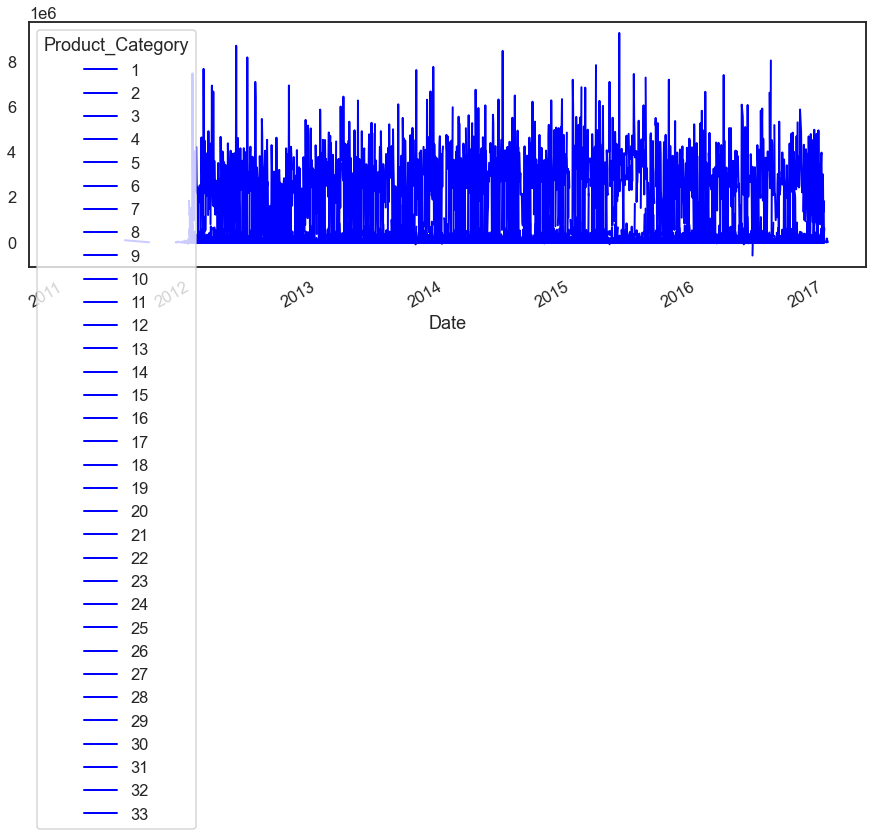

In [201]:
fig, ax = plt.subplots(figsize=(15,7))
demandData.groupby(['Date','Product_Category']).sum()["Order_Demand"].unstack().plot(ax=ax, color='blue', figsize=(15,5), linewidth=2, markersize=12, animated=True)

In [209]:
trainMean = (training - training.mean())
trainingModel = ARIMA(trainMean, order=(2,0,4))
trainingModelFit = trainingModel.fit()
print(trainingModelFit.summary())

                              ARMA Model Results                              
Dep. Variable:           Order_Demand   No. Observations:                 1828
Model:                     ARMA(2, 4)   Log Likelihood              -12241.594
Method:                       css-mle   S.D. of innovations            195.540
Date:                Mon, 12 Oct 2020   AIC                          24499.187
Time:                        11:34:08   BIC                          24543.275
Sample:                    12-26-2011   HQIC                         24515.449
                         - 12-26-2016                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6231      4.603     -0.135      0.892      -9.645       8.398
ar.L1.Order_Demand     1.2470      0.000   4501.138      0.000       1.246       1.248
ar.L2.Order_Demand  

In [216]:
rs_fit = pm.auto_arima(training, start_p=0, start_q=0, max_p=10, max_d=10, max_q=10, m=7,
                       start_P=0, max_P=10, max_D=10, max_Q=10, seasonal=True,
                       stationary=False,
                       d=1, D=1,
                       error_action='ignore',  # don't want to know if an order does not work
                       suppress_warnings=True,  # don't want convergence warnings
                       stepwise=True, )

predictions = rs_fit.fit_predict(training, n_periods=testing.shape[0])
predictions_df = pd.DataFrame(predictions)
predictions_df.index = test_series.index
plt.plot(testing)
plt.plot(predictions_df, color='red')
plt.show()


r2Test = (testing - training.mean())

start_predict_date = r2Test.index[0]
end_predict_date = r2Test.index[-1]
predictions = trainingModelFit.predict(start=start_predict_date, end=end_predict_date)

plt.plot(r2Test)
plt.plot(predictions, color='green')
plt.show()

NameError: name 'pm' is not defined